<a href="https://colab.research.google.com/github/ychoi-kr/pytorch_book_info/blob/main/notebooks/ch01_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1장 Python 입문
PyTorchを使ったディープラーニング・プログラミングで重要になる概念だけを抜き出して説明する

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1

'tail'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install japanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [5]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)


## 1.2 컨테이너 타입 변수에 주의
Pythonでは、変数は単に実際のデータ構造へのポインタに過ぎない。  
Numpy配列などでは、このことを意識しないと思わぬ結果を招く場合がある。

### NumPy変数間

In [6]:
# 넘파이 배열 x를 정의
x = np.array([5, 7, 9])

# 변수 y에 x를 대입
y = x

# 결과 확인
print(x)
print(y)

[5 7 9]
[5 7 9]


In [7]:
# x의 특정 요소를 변경
x[1] = -1

# y도 따라서 값이 바뀜
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [8]:
# y도 동시에 변하면 안 되는 경우는, 대입 시 copy 함수를 이용
x = np.array([5, 7, 9])
y = x.copy()

# x의 특정 요소 값이 변해도, y에는 영향이 없음
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### テンソルとNumPy間

In [9]:
import torch

# x1: shape=[5]가 되는 모든 값이 1인 텐서
x1 = torch.ones(5)

# 결과 확인
print(x1)

# x2: x1로부터 생성한 넘파이 배열
x2 = x1.data.numpy()

# 결과 확인
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [10]:
# x1의 값을 변경
x1[1] = -1

# x2의 값도 같이 변함
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [11]:
# 안전한 방법

# x1: 텐서
x1 = torch.ones(5)

# x2: x1를 copy한 넘파이
x2 = x1.data.numpy().copy()

x1[1] = -1

# 결과 확인
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 1.3	‘합성 함수’를 파이썬으로 구현하기
数学上の合成関数がPythonでどう実装されるか確認する

$f(x) = 2x^2 + 2$を関数として定義する

In [12]:
def f(x):
    return (2 * x**2 + 2)

In [13]:
# 넘파이 배열로 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [14]:
# f(x)의 결과를 y에 대입
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


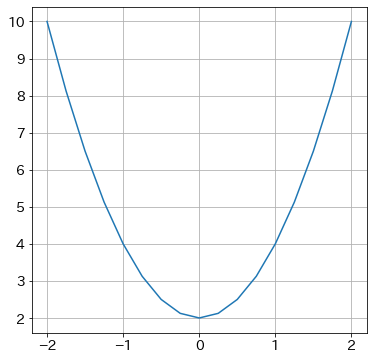

In [15]:
# 함수를 그래프로 그리기

fig1 = plt.gcf()
plt.plot(x, y)
plt.show()
fig1.savefig('ex01-09.tif', format='tif')

In [16]:
# 세 가지 기본 함수의 정의
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기
x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [17]:
# 合成関数の値の確認
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


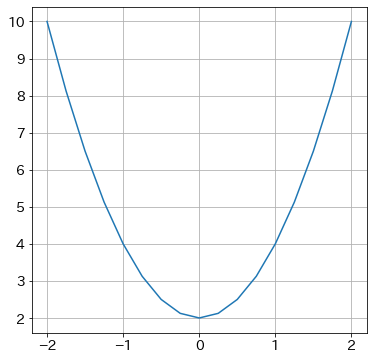

In [18]:
# 合成関数のグラフ表示

plt.plot(x, y)
plt.show()

## 1.5	커스텀 클래스 정의하기
Pythonでは、関数もまた、変数名は単なるポインタで、実体は別にある。  
このことを利用すると、「関数を引数とする関数」を作ることが可能になる。

ここで関数を数値微分する関数``diff``を定義する。  
数値微分の計算には、普通の微分の定義式よりいい近似式である $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$を利用する。

In [19]:
# 함수를 미분하는 함수 fdiff의 정의
def fdiff(f):
    # 함수 f를 인수로 미분한 결과 함수를 diff 로 정의
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # fdiff의 반환은 미분한 결과 함수 diff
    return diff

2次関数fに対して、今作った関数fdiffを適用して、数値微分計算をしてみる。

In [20]:
# 2차함수의 수치미분

# f의 미분결과 함수 diff를 취득
diff = fdiff(f)

# 미분결과를 계산하고 y_dash에 대입
y_dash = diff(x)

# 결과 확인
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


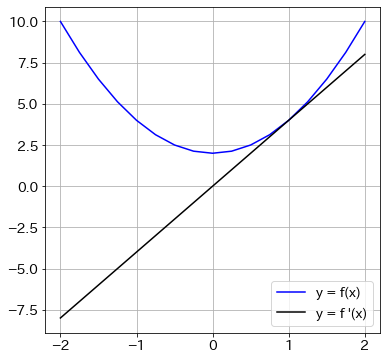

In [21]:
# 결과 그래프 출력
fig1 = plt.gcf()
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()
fig1.savefig('ex01-13.tif', format='tif')

シグモイド関数 $g(x) = \dfrac{1}{1 + \exp(-x)}$に対して同じことをやってみる。

In [22]:
# 시그모이드 함수의 정의
def g(x):
    return 1 / (1 + np.exp(-x))

In [23]:
# 시그모이드 함수 계산
y = g(x)
print(y)

[0.1192  0.14805 0.18243 0.2227  0.26894 0.32082 0.37754 0.43782 0.5
 0.56218 0.62246 0.67918 0.73106 0.7773  0.81757 0.85195 0.8808 ]


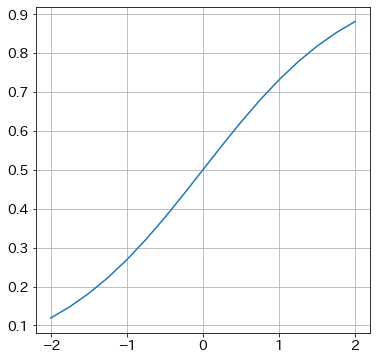

In [24]:
# 그래프 출력

fig1 = plt.gcf()
plt.plot(x, y)
plt.show()
fig1.savefig('ex01-16.tif', format='tif', dpi=300)

In [25]:
# 시그모이드 함수의 수치미분

# g를 미분한 함수 취득
diff = fdiff(g)

# diff를 사용해 미분 결과 y_dash를 계산
y_dash = diff(x)

# 결과 확인
print(y_dash)

[0.10499 0.12613 0.14915 0.1731  0.19661 0.21789 0.235   0.24613 0.25
 0.24613 0.235   0.21789 0.19661 0.1731  0.14915 0.12613 0.10499]


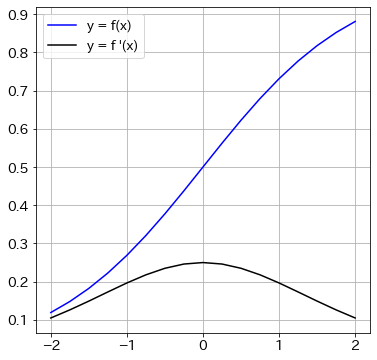

In [26]:
# 結果のグラフ表示
fig1 = plt.gcf()
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()
fig1.savefig('ex01-18.tif', format='tif', dpi=300)

シグモイド関数の微分結果は$y(1-y)$となることがわかっている。  
これはyの二次関数で、$y=\dfrac{1}{2}$の時に最大値$\dfrac{1}{4}$を取る。  
上のグラフはその結果と一致していて、数値微分が正しくできていることがわかる。

## 1.5	커스텀 클래스 정의하기

In [27]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [28]:
# Point 클래스 정의

class Point:
    # 인스턴스 생성 시에 두개두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y
    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

In [29]:
# Point 클래스로 인스턴스 변수 p1과 p2 생성
p1 = Point(2,3)
p2 = Point(-1, -2)

In [30]:
# p1과 p2의 속성 x, y
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


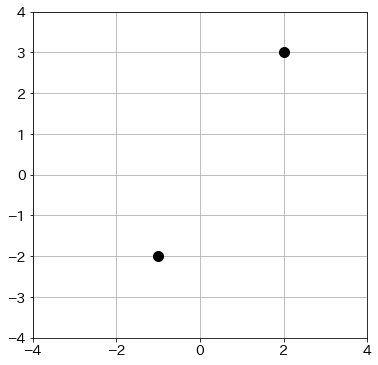

In [31]:
# p1과 p2의 draw 함수를 호출하고, 두 개의 점을 출력함
fig1 = plt.gcf()
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
fig1.savefig('ex01-22.tif', format='tif', dpi=300)

In [32]:
# Point의 자식 클래스 Circle 정의 1
class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # 이 단계에서 draw 함수는 정의하지 않음

In [33]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [34]:
# c1_1의 속성 확인
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


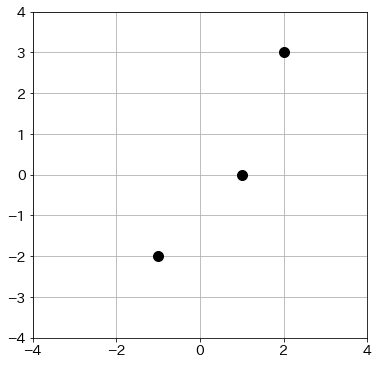

In [35]:
# p1, p2, c1_1의 각 draw 함수를 호출
fig1 = plt.gcf()
ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
fig1.savefig('ex01-25.tif', format='tif', dpi=300)

この段階でdraw関数は親で定義した関数が呼ばれていることがわかる

In [36]:
# Point의 자식 클래스 Circle의 정의 2
class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [37]:
# 클래스 Circle2로부터 인스턴스 변수 c2_1를 생성
c2_1 = Circle2(1, 0, 2)

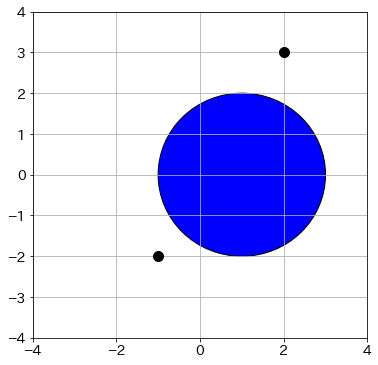

In [38]:
# p1, p2, c2_1의 각 draw 함수를 호출
fig1 = plt.gcf()
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
fig1.savefig('ex01-27.tif', format='tif', dpi=300)

親のdarw関数の代わりに子のdraw関数が呼ばれたことがわかる  
では、この関数と親の関数を両方呼びたいときはどうしたらいいか

In [39]:
# Point의 자식 클래스 Circle의 정의 3
class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # Circle의 draw 함수는 부모의 함수를 호출 한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [40]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

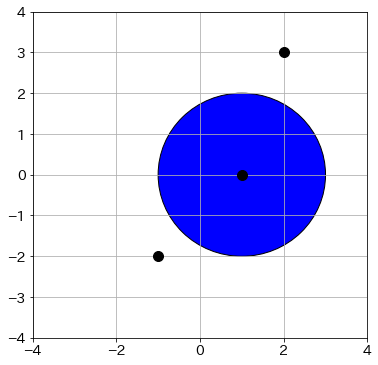

In [41]:
# p1, p2, c3_1의 각 draw 함수를 호출
fig1 = plt.gcf()
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
fig1.savefig('ex01-29.tif', format='tif', dpi=300)

無事、両方を呼び出すことができた

## 1.6	인스턴스를 함수로 사용하는 방법

In [42]:
# 함수 클래스 H의 정의
class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [43]:
# h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H() 

# 함수 h 호출
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


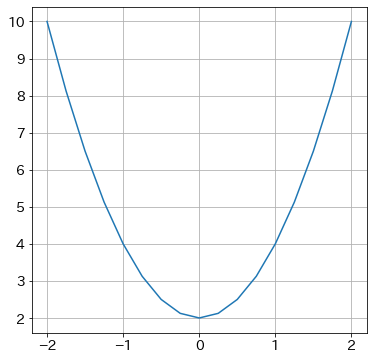

In [44]:
# 그래프 출력
fig1 = plt.gcf()
plt.plot(x, y)
plt.show()
fig1.savefig('ex01-32.tif', format='tif', dpi=300)